# Convolutional Neural Network, Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt # to visualize only
import pandas as pd
from sklearn.model_selection import train_test_split

import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import backend as K

Using TensorFlow backend.


## read in training data

In [2]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None)
x = x.values # dataframe to numpy ndarray
x = x.astype(np.float32)
x /= 255 # normalize

In [3]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

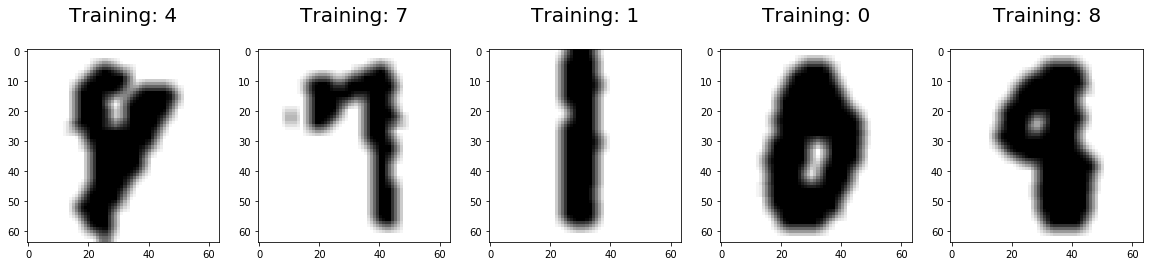

In [4]:
# look at some data for data import sanity check
def plotter(images, labels, start):
    plt.figure(figsize=(20,4))
    for index, (image, label) in enumerate(zip(images[start:start+5], labels[start:start+5])):
        plt.subplot(1, 5, index + 1)
        plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
        plt.title('Training: %i\n' % label, fontsize = 20)
plotter(x, y, 0) # first 5 images

In [5]:
# split it on up
np.random.seed(100) # for determinism
x_train, x_valid, y_train, y_valid = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [7]:
# sanity check that all the shapes of the data are correct
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45000, 64, 64, 1)
(5000, 64, 64, 1)
(45000,)
(5000,)


In [8]:
# train an encoder to convert labels to integer labels, one-hot encodings, and back
encoder = LabelEncoder().fit(y.reshape((y.shape[0],)))

def encode_onehot(lab):
    return to_categorical(encoder.transform(lab))

def decode_onehot(lab):
    return encoder.inverse_transform(np.argmax(lab, axis = 1))

In [ ]:
# load the test set to produce predictions for kaggle.  dont' run this cell
# or the following two cells if you don't want to make test set predictions
x_test = pd.read_csv("./data/processed_test_x.csv", delimiter=",", header = None)
x_test = x_test.values
x_test = x_test.astype(np.float32)
x_test /= 255

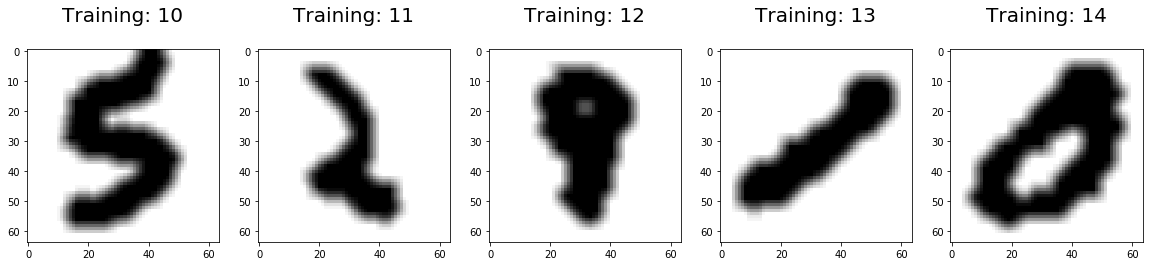

In [18]:
# display the loaded test set for image quality sanity check
plotter(x_test, ids, 10)

In [ ]:
if K.image_data_format() == 'channels_first':
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
else:
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

## Trying different architectures and hyperparams

In [19]:
# some convnet hyperparams
batch_size = 128
epochs = 15

num_classes = 10
img_rows, img_cols, = 64, 64

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_valid = x_valid.reshape(x_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [20]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

In [21]:
rfield=8
pool_size=2
model2 = Sequential()
model2.add(Conv2D(8, (rfield, rfield), padding='same', input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(Conv2D(8, (rfield, rfield)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(0.25))

model2.add(Conv2D(16, (rfield, rfield), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(16, (rfield, rfield), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [22]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape=input_shape))
model3.add(Activation('relu'))
BatchNormalization(axis=-1)
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model3.add(Conv2D(64,(3, 3)))
model3.add(Activation('relu'))
BatchNormalization(axis=-1)
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())

BatchNormalization()
model3.add(Dense(512))
model3.add(Activation('relu'))
BatchNormalization()
model3.add(Dropout(0.5))
model3.add(Dense(10))

model3.add(Activation('softmax'))

In [23]:
model4 = Sequential()
model4.add(Conv2D(30, (5, 5), input_shape=input_shape, activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(15, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

In [24]:
models = [model1, model2, model3, model4]
histories = []
for m in models:
    m.compile(loss=ks.losses.categorical_crossentropy,
              optimizer=ks.optimizers.Adadelta(),
              metrics=['accuracy'])
    history = m.fit(x_train, encode_onehot(y_train),
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_valid, encode_onehot(y_valid)))
    histories.append(history)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
45000/45000 [==============================] - 16s 351us/step - loss: 1.3769 - acc: 0.5418 - val_loss: 0.5810 - val_acc: 0.8238
Epoch 2/15
45000/45000 [==============================] - 15s 344us/step - loss: 0.6783 - acc: 0.8039 - val_loss: 0.3978 - val_acc: 0.8900
Epoch 3/15
45000/45000 [==============================] - 15s 344us/step - loss: 0.5311 - acc: 0.8542 - val_loss: 0.3457 - val_acc: 0.9078
Epoch 4/15
45000/45000 [==============================] - 15s 344us/step - loss: 0.4701 - acc: 0.8733 - val_loss: 0.3105 - val_acc: 0.9218
Epoch 5/15
45000/45000 [==============================] - 15s 344us/step - loss: 0.4305 - acc: 0.8856 - val_loss: 0.3249 - val_acc: 0.9178
Epoch 6/15
45000/45000 [==============================] - 16s 345us/step - loss: 0.4036 - acc: 0.8929 - val_loss: 0.3010 - val_acc: 0.9206
Epoch 7/15
45000/45000 [==============================] - 15s 343us/step - loss: 0.3820 - acc: 0.9018 - val_loss: 0.3

45000/45000 [==============================] - 5s 109us/step - loss: 0.1928 - acc: 0.9510 - val_loss: 0.2212 - val_acc: 0.9480
Epoch 14/15
45000/45000 [==============================] - 5s 108us/step - loss: 0.1873 - acc: 0.9527 - val_loss: 0.2168 - val_acc: 0.9520
Epoch 15/15
45000/45000 [==============================] - 5s 110us/step - loss: 0.1803 - acc: 0.9541 - val_loss: 0.2205 - val_acc: 0.9460


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

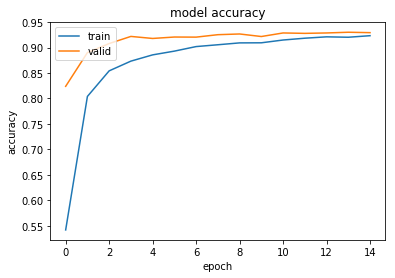

final validation accuracy: 0.9292
best validation accuracy: 0.93
number of params in model: 7393034
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
__________________________________________

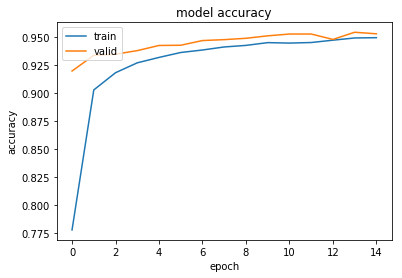

final validation accuracy: 0.9528
best validation accuracy: 0.9542
number of params in model: 432058
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
_________________________________________

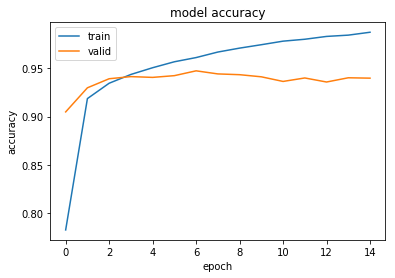

final validation accuracy: 0.9398
best validation accuracy: 0.9474
number of params in model: 5608426
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
________________________________________

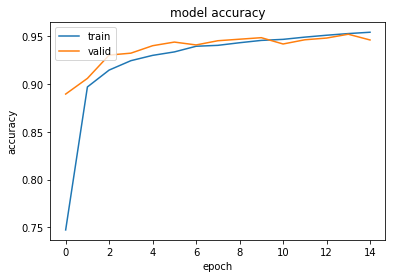

final validation accuracy: 0.946
best validation accuracy: 0.952
number of params in model: 388253


In [30]:
for hist,mod in zip(histories,models):
    print(model.summary())
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    print("final validation accuracy: {}".format(hist.history['val_acc'][-1]))
    print("best validation accuracy: {}".format(max(hist.history['val_acc'])))
    print("number of params in model: {}".format(mod.count_params()))

In [37]:
# redefine model so it starts with fresh weights, "cold start"
rfield=8
pool_size=2
model2 = Sequential()
model2.add(Conv2D(8, (rfield, rfield), padding='same', input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(Conv2D(8, (rfield, rfield)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(0.25))

model2.add(Conv2D(16, (rfield, rfield), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(16, (rfield, rfield), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [38]:
model4 = Sequential()
model4.add(Conv2D(30, (5, 5), input_shape=input_shape, activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(15, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))

In [39]:
# try letting the best 2 of the 4 CNN architectures run for more epochs
epochs = 20 # five more epochs, so 20
models2 = [model2, model3]
histories2 = []
for m in models2:
    m.compile(loss=ks.losses.categorical_crossentropy,
              optimizer=ks.optimizers.Adadelta(),
              metrics=['accuracy'])
    history = m.fit(x_train, encode_onehot(y_train),
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_valid, encode_onehot(y_valid)))
    histories2.append(history)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 9s 189us/step - loss: 0.7844 - acc: 0.7657 - val_loss: 0.3401 - val_acc: 0.9086
Epoch 2/20
45000/45000 [==============================] - 8s 177us/step - loss: 0.3809 - acc: 0.9049 - val_loss: 0.2684 - val_acc: 0.9308
Epoch 3/20
45000/45000 [==============================] - 8s 177us/step - loss: 0.3307 - acc: 0.9195 - val_loss: 0.2386 - val_acc: 0.9428
Epoch 4/20
45000/45000 [==============================] - 8s 177us/step - loss: 0.3013 - acc: 0.9287 - val_loss: 0.2385 - val_acc: 0.9388
Epoch 5/20
45000/45000 [==============================] - 8s 177us/step - loss: 0.2845 - acc: 0.9328 - val_loss: 0.2194 - val_acc: 0.9476
Epoch 6/20
45000/45000 [==============================] - 8s 178us/step - loss: 0.2708 - acc: 0.9362 - val_loss: 0.2305 - val_acc: 0.9430
Epoch 7/20
45000/45000 [==============================] - 8s 177us/step - loss: 0.2599 - acc: 0.9386 - val_loss: 0.2183 - v

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

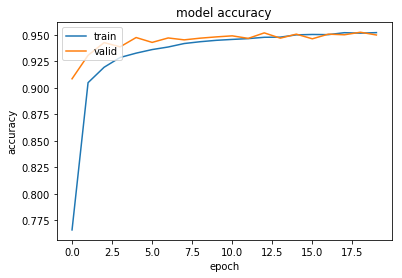

final validation accuracy: 0.95
best validation accuracy: 0.9526
number of params in model: 432058
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               7372928   
___________________________________________

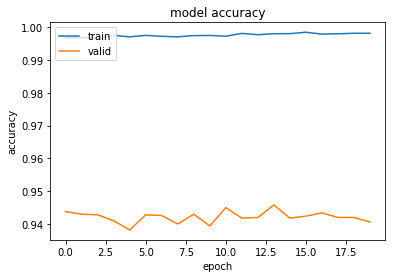

final validation accuracy: 0.9406
best validation accuracy: 0.9458
number of params in model: 5608426


In [41]:
for hist,mod in zip(histories2,models2):
    print(model.summary())
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    print("final validation accuracy: {}".format(hist.history['val_acc'][-1]))
    print("best validation accuracy: {}".format(max(hist.history['val_acc'])))
    print("number of params in model: {}".format(mod.count_params()))

In [25]:
# model2 did the best so use that for test predictions for kaggle.
# don't run this cell if you don't want to produce test predictions
predictions = model2.predict_classes(x_test)
ids = list(range(len(predictions)))

print(predictions[:100])
output = pd.DataFrame({'Id': ids, 'Label': predictions})
output.to_csv("./data/ConvNetPredictions2.csv", header = True, index = False)

[7 2 0 7 6 1 5 3 8 1 5 2 9 1 0 2 3 0 0 3 3 0 6 1 6 0 2 8 3 0 2 8 9 1 8 6 0
 1 3 4 0 7 1 1 0 2 3 6 8 4 9 7 3 9 8 2 2 6 5 9 9 9 3 3 8 8 3 8 9 5 2 4 9 4
 8 3 1 8 1 4 9 4 6 8 3 8 7 7 1 6 3 9 0 2 9 3 9 7 2 4]


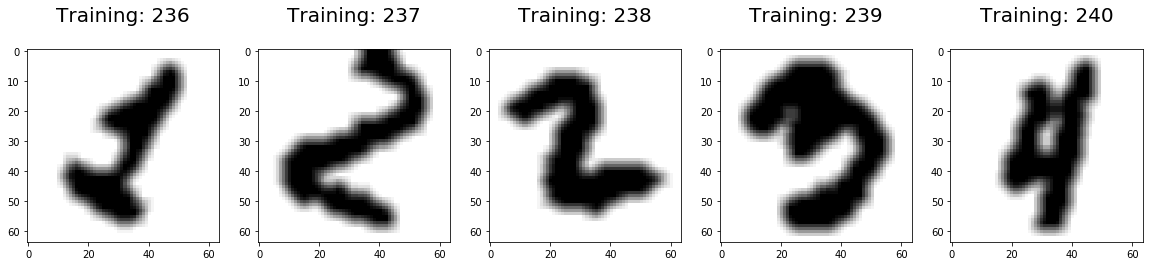

In [35]:
# let's look at how we did on five images at a time
plotter(x_test, ids, 236)